# Energy Transitions Python Tutorial

Using Python, create a plot of primary energy consumption over time from 1635 to 2017.

## Import libraries

There are certain libraries that you're going to need to complete this assignment. I'm going to be giving brief, big-picture summaries.

### pandas

*pandas* is a library that lets you use conduct analyses on dataframes (instead of just regular vectors/arrays in python). 

The "as pd" in the next line means from this point onward, when we want to call a function in the pandas library, we can just use "pd" for short.

In [1]:
import pandas as pd

## Read in CSV file as a dataframe

Reading in CSV files is easy thanks to pandas' ``read_csv`` function, which imports CSV files as dataframes.

Our CSV file is kept in a subfolder named "data", so we have to reference that folder when calling on the CSV file.

If you take a look at the CSV file, you'll notice that the first row contains a URL, and the second row is a summary of the data table. We can tell ``read_csv`` to skip the first two rows, so that the function will start creating a dataframe from the third row and onward.

You can give your dataframe any name you would like (as long it doesn't contain any spaces, periods, or special characters (except for an underscore). I'm going to name the dataframe ``df_data``.

In [2]:
df_data = pd.read_csv('data/Primary Energy Consumption_from 1635.csv', skiprows = 2)

Now that you have a dataframe, you can view the first 5 rows using the ``head()`` function.

In [3]:
df_data.head()

,Unnamed: 0,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/biomass,Solar,Wind,Total Renewable Energy
0,1635,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,1645,NaN,NaN,NaN,0.0,NaN,NaN,0.001,NaN,NaN,0.001
2,1655,NaN,NaN,NaN,0.0,NaN,NaN,0.002,NaN,NaN,0.002
3,1665,NaN,NaN,NaN,0.0,NaN,NaN,0.005,NaN,NaN,0.005
4,1675,NaN,NaN,NaN,0.0,NaN,NaN,0.007,NaN,NaN,0.007


To gain general information on the dataframe, use ``info()``.

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 11 columns):
Unnamed: 0                112 non-null int64
Coal                      91 non-null float64
Natural Gas               83 non-null float64
Petroleum                 88 non-null float64
Total Fossil              112 non-null float64
Nuclear                   62 non-null float64
Hydropower                82 non-null float64
Wood/biomass              111 non-null float64
Solar                     35 non-null float64
Wind                      36 non-null float64
Total Renewable Energy    112 non-null float64
dtypes: float64(10), int64(1)
memory usage: 9.7 KB


From the information above, we can see there are 112 rows (entries), and each column is a fuel type. The first column, which should be the year, is missing a column name (since the cell is empty in the CSV file). We can rename the column in the dataframe, without having to edit the CSV file.

### Rename column

To rename a column, use the ``rename`` function, and specify that we're trying to rename columns. If the column you want to rename already has an existing name, you can specify the original column name. However, in our case, the column itself is *unnamed*. Thus, we're going to use a number index to specify the column. In Python, the index number starts at **zero** (instead of 1). So, the first column in the CSV file corresponds to the 0 indexed column. We can specify that column index and choose to rename it to "Year".

In [5]:
df_data = df_data.rename(columns = { df_data.columns[0]: "Year" })

Let's take a look at the head of the dataframe again:

In [6]:
df_data.head()

,Year,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/biomass,Solar,Wind,Total Renewable Energy
0,1635,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,1645,NaN,NaN,NaN,0.0,NaN,NaN,0.001,NaN,NaN,0.001
2,1655,NaN,NaN,NaN,0.0,NaN,NaN,0.002,NaN,NaN,0.002
3,1665,NaN,NaN,NaN,0.0,NaN,NaN,0.005,NaN,NaN,0.005
4,1675,NaN,NaN,NaN,0.0,NaN,NaN,0.007,NaN,NaN,0.007


## Fill NAs

We can see from the dataframe that there are a lot of empty values, especially in the earlier years. Pandas has converted the empty cells in the CSV to NaN (null) values.

For our plot, we need to replace the NA values. In our case, we're going to replace all incidences of NaN with zero (0). While this assumption is okay for this analysis, please note that it's not always technically correct to simply replace NaNs with zeroes. Use the ``fillna`` function, in which you can specify what the replacement value you want is.

### Fill NAs for specific column

If you want to fill NaN values one column at a time, you can specify the column you want to apply the function on. As an example, let's say we want to replace the NaNs in the Natural Gas column with zeroes.

In [7]:
df_data['Natural Gas'] = df_data['Natural Gas'].fillna(0)

In [8]:
df_data.head()

,Year,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/biomass,Solar,Wind,Total Renewable Energy
0,1635,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,1645,NaN,0.0,NaN,0.0,NaN,NaN,0.001,NaN,NaN,0.001
2,1655,NaN,0.0,NaN,0.0,NaN,NaN,0.002,NaN,NaN,0.002
3,1665,NaN,0.0,NaN,0.0,NaN,NaN,0.005,NaN,NaN,0.005
4,1675,NaN,0.0,NaN,0.0,NaN,NaN,0.007,NaN,NaN,0.007


### Fill NAs for entire dataframe

It's going to be annoying doing that for every column. Let's instead replace every NaN in the entire dataframe:

In [9]:
df_data = df_data.fillna(0)

## Create new column for sum of non-hydro renewables

The assignment specifies that there should be an "Other Rewnewables" column, which would be separate from Hydropower. The "Other Renewables" column should be the sum of solar and wind energy. Since such a column does not exist in the dataframe, we can create a new dataframe that is the sum of the Solar and Wind columns.

In [10]:
df_data['Other Renewables'] = df_data['Solar'] + df_data['Wind']

In [11]:
df_data.head()

,Year,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/biomass,Solar,Wind,Total Renewable Energy,Other Renewables
0,1635,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
1,1645,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.001,0.0
2,1655,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.002,0.0
3,1665,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.005,0.0
4,1675,0.0,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.007,0.0


Looking at the first few rows of the dataframe doesn't tell us much, since both solar and wind energy consumption were zero from 1635 to 1675. We can instead glance at the *last* five rows of the dataframe using ``tail()``.

In [12]:
df_data.tail()

,Year,Coal,Natural Gas,Petroleum,Total Fossil,Nuclear,Hydropower,Wood/biomass,Solar,Wind,Total Renewable Energy,Other Renewables
107,2014,17.997632,27.382833,34.763494,80.143959,8.337559,2.466577,4.994208,0.337412,1.727542,9.525739,2.064954
108,2015,15.548870,28.191095,35.477609,79.217574,8.336886,2.321177,4.983358,0.426621,1.777306,9.508462,2.203927
109,2016,14.225905,28.400352,35.816631,78.442888,8.426753,2.472442,5.020163,0.570008,2.095595,10.158208,2.665603
110,2017,13.837465,28.034233,36.173585,78.045283,8.418968,2.766969,5.084265,0.776888,2.342890,10.971012,3.119778
111,2018,13.241336,30.964810,36.945274,81.151420,8.441226,2.687652,5.127819,0.951353,2.533131,11.299955,3.484484


We can check that for the very last row: 0.951353 (solar) + 2.533131 (wind) = 3.484484 (other renewables).

## Transform data

When plotting a time series of categorical data, it's often easiest to have your data in a "long" format instead of a "wide" format (like df_data). So, this next step will transform your data so that all the values for the different fuel types will be put into a single column. Another column labeled "Fuel" will specify the type of fuel.

In [13]:
df_long = pd.melt(df_data, 
                  id_vars = 'Year', 
                  value_vars = ['Coal', 'Natural Gas', 'Petroleum', 
                                'Nuclear', 'Hydropower', 
                                'Wood/biomass', 'Solar', 'Wind', 
                                'Other Renewables', 'Total Fossil', 'Total Renewable Energy'], 
                  var_name = 'Fuel', value_name = 'Value')

In [14]:
df_long.head()

,Year,Fuel,Value
0,1635,Coal,0.0
1,1645,Coal,0.0
2,1655,Coal,0.0
3,1665,Coal,0.0
4,1675,Coal,0.0


## Remove fuels

There are some fuels in the dataframe we don't really need anymore, such as "Total Fossil", "Total Renewable Energy", "Solar", and "Wind". Let's make a new dataframe titled ``df_fuels`` without the fuels we don't need.

In [15]:
df_fuels = df_long[~df_long.Fuel.isin(['Total Fossil', 'Total Renewable Energy', 'Solar', 'Wind'])]

# Line plot of fuel consumption by fuel

## Import libraries

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Preliminary plot

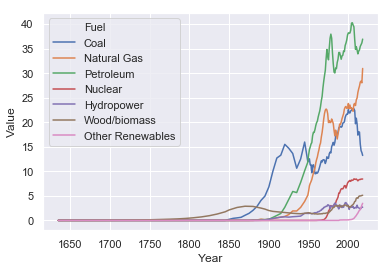

In [17]:
# create generic line plot
sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel");

### Specify fuel type colors

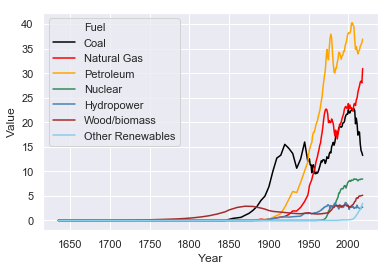

In [18]:
# create line plot with specified line colors
sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel",
                 palette = {"Petroleum": "orange",
                             "Natural Gas": "red",
                             "Coal": "black",
                             "Nuclear": "seagreen",
                             "Hydropower": "steelblue",
                             "Wood/biomass": "brown",
                             "Other Renewables": "skyblue"});

### Adjustments to labels and aesthetics of plot

While the plot above does technically display the information we want, it's not that pretty to look at. Let's change up the plot axes and aesthetics a bit.

In [19]:
# set style of plot to a white grid
sns.set_style("whitegrid")

In [20]:
# change font of all axes and labels to Arial Narrow
plt.rcParams["font.family"] = "Arial Narrow"

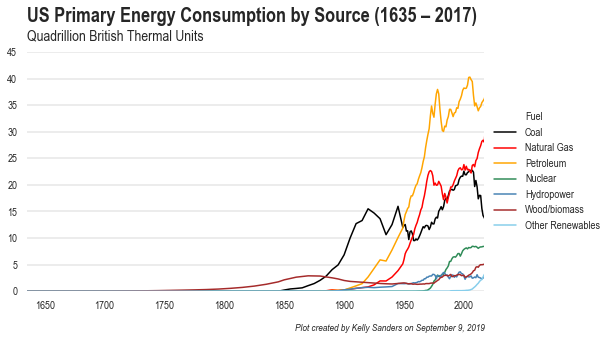

In [21]:
# create new figure, with dimensions of width = 8.2 inches and height = 4.4 inches
fig, ax = plt.subplots(figsize = (8.2,4.4))

# create line plot with specified line colors
p = sns.lineplot(data = df_fuels, x = "Year", y = "Value", hue = "Fuel",
                 palette = {"Petroleum": "orange",
                            "Natural Gas": "red",
                            "Coal": "black",
                            "Nuclear": "seagreen",
                            "Hydropower": "steelblue",
                            "Wood/biomass": "brown",
                            "Other Renewables": "skyblue"});

# manually set the limits for the x-axis and y-axis
ax.set_xlim([1635,2017]);
ax.set_ylim([0,45]);

# set the title of the plot, as well as the font size and font weight
ax.set_title('US Primary Energy Consumption by Source (1635 – 2017)', y = 1.1, fontsize = 20, fontweight='bold', loc='left');

# make the x-axis and y-axis labels blank
ax.set_xlabel('');
ax.set_ylabel('');

# manually add a subtitle below the title
# set the x position of the subtitle at the lower limit of the x-axis
# set the y location of the subtitle at 1.05 times the upper limit of the y-axis 
ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1.05, 'Quadrillion British Thermal Units', horizontalalignment='left', fontsize = 15);

# remove vertical (x-axis) grid lines
ax.xaxis.grid(which="major", color='r', linestyle='-', linewidth=0);

# keep horizontal (y-axis) grid lines, but make the color grey and width 0.3
ax.yaxis.grid(which="major", color='grey', linestyle='-', linewidth=0.3);

# remove the borders of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# move the legend to the outside of the plot (right) and remove the background color of the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);

# add footnote on the bottom right of the plot
# the position of a figtext is a float value (instead of data coordinates like a regular text above)
# thus, the values are all relative to the plot size. you can play around with the placements, but the selection below works as such:
# the x = 0.9 and horizontalalignment = 'right' places the right end of the figtext at where the x axis ends
# the y = 0 places the figtext directly below the bottom of the a-xis
plt.figtext(0.9, 0, 'Plot created by Kelly Sanders on September 9, 2019', horizontalalignment='right', fontstyle='italic');

### Save plot as image file

In [22]:
# save figure (be sure to change the name of the file to reflect your own name)
fig.savefig("Figure_Fuel-Consumption-by-Source_KTSanders.png", dpi = 600, bbox_inches='tight')

## Analyzing maximum values

In [23]:
df_fuels.head()

,Year,Fuel,Value
0,1635,Coal,0.0
1,1645,Coal,0.0
2,1655,Coal,0.0
3,1665,Coal,0.0
4,1675,Coal,0.0


What is the maximum amount of primary fuel consumed out of all of the years?

In [24]:
df_fuels[df_fuels['Value'] == df_fuels['Value'].max()]

,Year,Fuel,Value
322,2005,Petroleum,40.282775


The maximum amount of a specific fuel consumed was petroleum in the year 2005.

But what if we want to find the maximum of each fuel type instead? We can group the dataframe by "Fuel" to find the maximum of each group.

In [25]:
fuel_max = df_fuels.groupby('Fuel', as_index=False)['Value'].max()
fuel_max

,Fuel,Value
0,Coal,22.796543
1,Hydropower,3.640458
2,Natural Gas,30.964810
3,Nuclear,8.458589
4,Other Renewables,3.484484
5,Petroleum,40.282775
6,Wood/biomass,5.127819


From above, we can see what the maximum amount of fuel consumed for each fuel group. However, that doesn't tell us the corresponding year. That's because in the above code, we're just asking for the maximum of each fuel group. 

To get the year as well, use ``idmax`` to find the *row index* corresponding the maximum consumption for each fuel, then use the indices to with the dataframe to get the entire corresponding row (which includes the year).

In [26]:
df_fuels.loc[df_fuels.groupby(['Fuel'])['Value'].idxmax()]

,Year,Fuel,Value
98,2005,Coal,22.796543
538,1997,Hydropower,3.640458
223,2018,Natural Gas,30.964810
436,2007,Nuclear,8.458589
1007,2018,Other Renewables,3.484484
322,2005,Petroleum,40.282775
671,2018,Wood/biomass,5.127819


We can see that coal consumption peaked in 2005, whereas consumption of natural gas and non-hydro renewables peaked just last year in 2018.

## Analyzing the rate of change (pre-industrial revolution and post-industrial revolution)

From the line plot, we can see that around the 1840s and 1850s, coal consumption increases greatly from zero to being the top fuel consumed for a period of time. This coincides with the Industrial Revolution, during which the steam engine was invented. Let's study the data more closely.

In [27]:
# import the numpy library
import numpy as np

Create an array of years from 1835 to 1905, for every 10 years.

In [28]:
years = np.arange(1845,1906,10)
print(years)

[1845 1855 1865 1875 1885 1895 1905]


In [29]:
df_rev = df_fuels[df_fuels.Year.isin(years)]

In [30]:
df_rev['span'] = (df_rev['Year']-10).map(str) + '-' + (df_rev['Year']).map(str)

/Users/MEAS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_rev.head()

,Year,Fuel,Value,span
21,1845,Coal,0.000,1835-1845
23,1855,Coal,0.421,1845-1855
25,1865,Coal,0.632,1855-1865
27,1875,Coal,1.440,1865-1875
29,1885,Coal,2.840,1875-1885


In [32]:
df_rev['diff'] = df_rev.groupby(['Fuel'])['Value'].transform(lambda x: x.diff())
df_rev['perc_diff'] = df_rev.groupby(['Fuel'])['Value'].transform(lambda x: x.pct_change())

/Users/MEAS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/MEAS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Let's see how coal consumption changed over the years:

In [33]:
df_rev[df_rev['Fuel'] == 'Coal']

,Year,Fuel,Value,span,diff,perc_diff
21,1845,Coal,0.000,1835-1845,NaN,NaN
23,1855,Coal,0.421,1845-1855,0.421,inf
25,1865,Coal,0.632,1855-1865,0.211,0.501188
27,1875,Coal,1.440,1865-1875,0.808,1.278481
29,1885,Coal,2.840,1875-1885,1.400,0.972222
31,1895,Coal,4.950,1885-1895,2.110,0.742958
33,1905,Coal,10.001,1895-1905,5.051,1.020404


What about wood/biomass consumption?

In [34]:
df_rev[df_rev['Fuel'] == 'Wood/biomass']

,Year,Fuel,Value,span,diff,perc_diff
581,1845,Wood/biomass,1.757,1835-1845,NaN,NaN
583,1855,Wood/biomass,2.389,1845-1855,0.632,0.359704
585,1865,Wood/biomass,2.767,1855-1865,0.378,0.158225
587,1875,Wood/biomass,2.872,1865-1875,0.105,0.037947
589,1885,Wood/biomass,2.683,1875-1885,-0.189,-0.065808
591,1895,Wood/biomass,2.306,1885-1895,-0.377,-0.140514
593,1905,Wood/biomass,1.843,1895-1905,-0.463,-0.200781


You'll notice in in the dataframe, for the span 1835-1845, the difference is NaN (since there is no value to subtract from). We can drop all rows with a NaN:

In [35]:
df_rev = df_rev.dropna()

## Bar plot of absolute change in fuel consumption

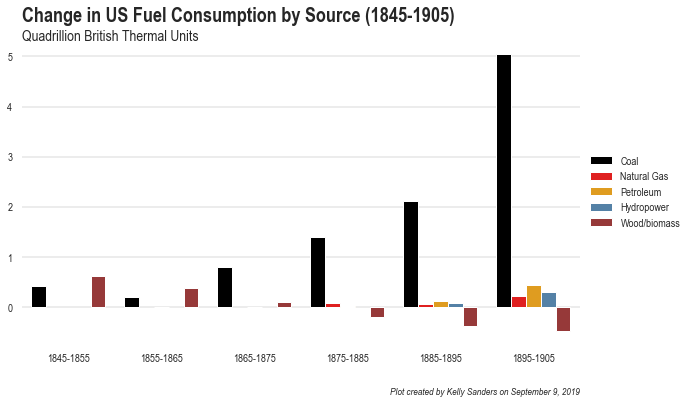

In [36]:
# create new figure, with dimensions of width = 8.2 inches and height = 4.4 inches
fig, ax = plt.subplots(figsize = (10,5.6))

# create line plot with specified line colors
p = sns.barplot(data = df_rev, x = "span", y = "diff", hue = "Fuel",
                 palette = {"Petroleum": "orange",
                            "Natural Gas": "red",
                            "Coal": "black",
                            "Nuclear": "seagreen",
                            "Hydropower": "steelblue",
                            "Wood/biomass": "brown",
                            "Other Renewables": "skyblue"});

# set the title of the plot, as well as the font size and font weight
ax.set_title('Change in US Fuel Consumption by Source (1845-1905)', y = 1.04, fontsize = 20, fontweight='bold', loc='left');

# make the x-axis and y-axis labels blank
ax.set_xlabel('');
ax.set_ylabel('');

# manually add a subtitle below the title
ax.text(ax.get_xlim()[0], ax.get_ylim()[1], 'Quadrillion British Thermal Units', horizontalalignment='left', fontsize = 15);

# remove vertical (x-axis) grid lines
ax.xaxis.grid(which="major", color='r', linestyle='-', linewidth=0);

# keep horizontal (y-axis) grid lines, but make the color grey and width 0.3
ax.yaxis.grid(which="major", color='grey', linestyle='-', linewidth=0.3);

# remove the borders of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# move the legend to the outside of the plot (right) and remove the background color of the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);

# add footnote on the bottom right of the plot
plt.figtext(0.9, 0, 'Plot created by Kelly Sanders on September 9, 2019', horizontalalignment='right', fontstyle='italic');

### Save plot as image file

In [37]:
fig.savefig("Figure_Absolute-Change-in-Fuel-Consumption_KTSanders.png", dpi = 600, bbox_inches='tight')

## Bar plot of percent change in fuel consumption

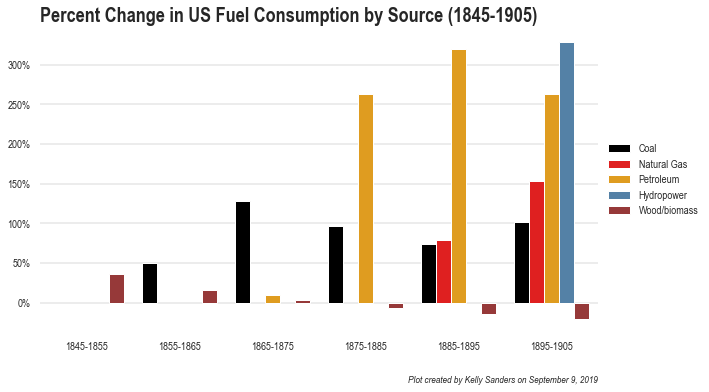

In [38]:
# create new figure, with dimensions of width = 8.2 inches and height = 4.4 inches
fig, ax = plt.subplots(figsize = (10,5.6))

# create line plot with specified line colors
p = sns.barplot(data = df_rev, x = "span", y = "perc_diff", hue = "Fuel",
                 palette = {"Petroleum": "orange",
                            "Natural Gas": "red",
                            "Coal": "black",
                            "Nuclear": "seagreen",
                            "Hydropower": "steelblue",
                            "Wood/biomass": "brown",
                            "Other Renewables": "skyblue"});

# set the title of the plot, as well as the font size and font weight
ax.set_title('Percent Change in US Fuel Consumption by Source (1845-1905)', y = 1, fontsize = 20, fontweight='bold', loc='left');

# make the x-axis and y-axis labels blank
ax.set_xlabel('');
ax.set_ylabel('');

# set y tick labels as percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# remove vertical (x-axis) grid lines
ax.xaxis.grid(which="major", color='r', linestyle='-', linewidth=0);

# keep horizontal (y-axis) grid lines, but make the color grey and width 0.3
ax.yaxis.grid(which="major", color='grey', linestyle='-', linewidth=0.3);

# remove the borders of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# move the legend to the outside of the plot (right) and remove the background color of the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);

# add footnote on the bottom right of the plot
plt.figtext(0.9, 0, 'Plot created by Kelly Sanders on September 9, 2019', horizontalalignment='right', fontstyle='italic');

### Save plot as image file

In [39]:
fig.savefig("Figure_Rate-of-Change-in-Fuel-Consumption_KTSanders.png", dpi = 600, bbox_inches='tight')